In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/Q3_Sikka data.csv")
df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        46 non-null     object 
 1   DAU         46 non-null     int64  
 2   Installs    46 non-null     int64  
 3   Uninstalls  46 non-null     int64  
 4   Signups     46 non-null     int64  
 5   Referrals   31 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df.set_index('Date', inplace=True)


In [ ]:
october_data = df.loc['2022-10-01':'2022-10-31']
november_data = df.loc['2022-11-01':'2022-11-15']


In [ ]:
X_train = october_data[['DAU', 'Installs', 'Uninstalls', 'Signups']]
y_train = october_data['Referrals']


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
X_november = november_data[['DAU', 'Installs', 'Uninstalls', 'Signups']]


In [ ]:
referrals_predicted = model.predict(X_november)


In [ ]:
november_data['Referrals'] = referrals_predicted


<ipython-input-14-32cad14902b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  november_data['Referrals'] = referrals_predicted


In [ ]:
november_data['Referrals']

Date
2022-11-01    495.153778
2022-11-02    459.461283
2022-11-03    410.559757
2022-11-04    473.238460
2022-11-05    446.478018
2022-11-06    475.012709
2022-11-07    441.082821
2022-11-08    472.434943
2022-11-09    516.298142
2022-11-10    527.804486
2022-11-11    545.867925
2022-11-12    525.497030
2022-11-13    556.220346
2022-11-14    561.187420
2022-11-15    699.071471
Name: Referrals, dtype: float64

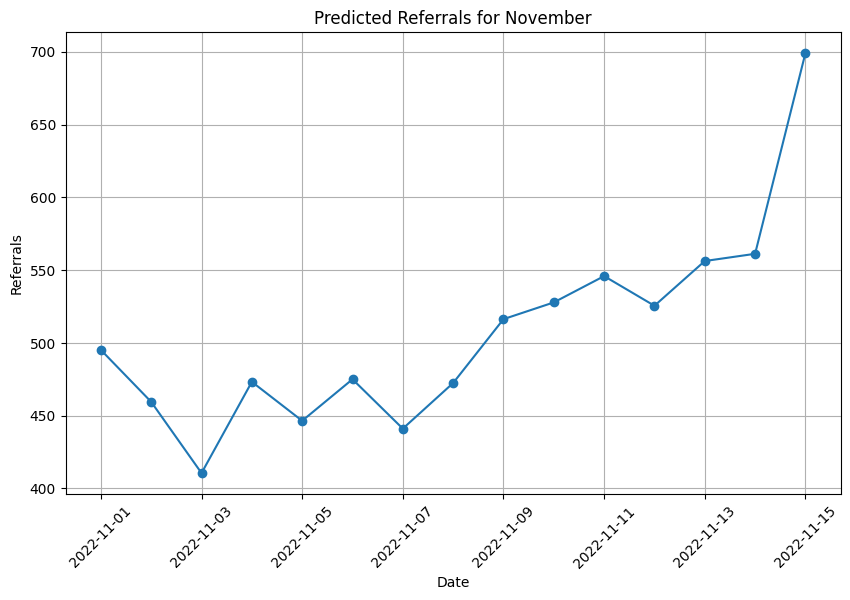

In [ ]:
import matplotlib.pyplot as plt

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(november_data.index, referrals_predicted, marker='o')
plt.title('Predicted Referrals for November')
plt.xlabel('Date')
plt.ylabel('Referrals')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Prepare the data
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)
october_data = df.loc['2022-10-01':'2022-10-31']
november_data = df.loc['2022-11-01':'2022-11-15']
october_referrals = october_data['Referrals'].values.reshape(-1, 1)


In [ ]:
october_data

In [ ]:
november_data

In [ ]:
october_referrals

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_october_referrals = scaler.fit_transform(october_referrals)

In [ ]:
# Create sequences for LSTM
lookback = 3  # Number of previous days to consider  Complete model depends on this parameter
X_train, y_train = [], []
for i in range(lookback, len(scaled_october_referrals)):
    X_train.append(scaled_october_referrals[i-lookback:i, 0])
    y_train.append(scaled_october_referrals[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [ ]:
X_train

In [ ]:
y_train

array([0.75401731, 0.78121137, 0.99134734, 0.96044499, 1.        ,
       0.74536465, 0.58838072, 0.47960445, 0.82571075, 0.51545117,
       0.23238566, 0.27441286, 0.39060569, 0.15822002, 0.18046972,
       0.12360939, 0.        , 0.06304079, 0.13226205, 0.20642769,
       0.21137206, 0.18788628, 0.23362176, 0.04326329])

In [ ]:
# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 3, 50)             10400     
                                                                 
 lstm_7 (LSTM)               (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Predict referrals for November
last_sequence = scaled_october_referrals[-lookback:].reshape(1, lookback, 1)
referrals_predicted = []
for _ in range(len(november_data)):
    prediction = model.predict(last_sequence)
    referrals_predicted.append(prediction)
    last_sequence = np.append(last_sequence[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

referrals_predicted = np.array(referrals_predicted).reshape(-1, 1)
referrals_predicted = scaler.inverse_transform(referrals_predicted)

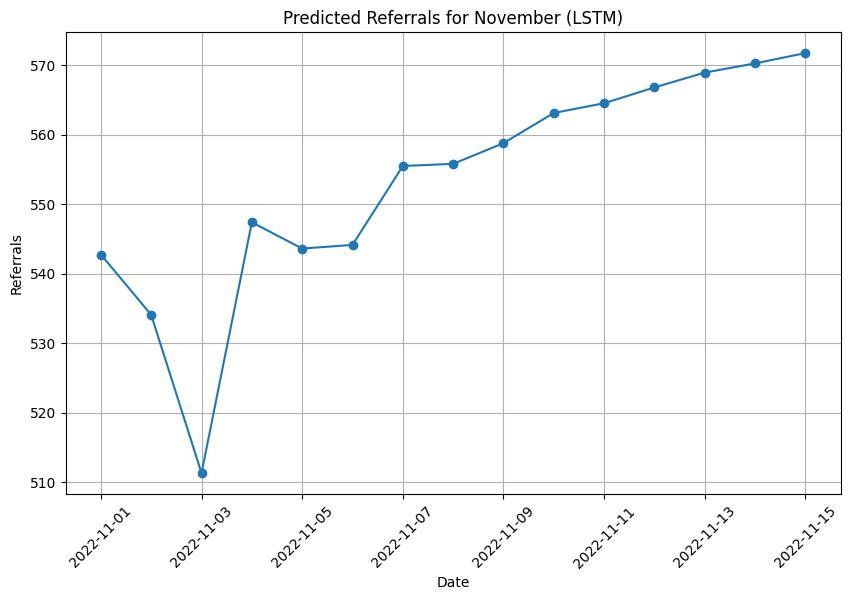

In [ ]:
# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(november_data.index, referrals_predicted, marker='o')
plt.title('Predicted Referrals for November (LSTM)')
plt.xlabel('Date')
plt.ylabel('Referrals')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()